The first step when performing data analysis, and perhaps a critical one, is data rescaling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dfWhole = pd.read_csv('delayed_flights_clean.csv')
dfWhole.head(5)

,Unnamed: 0,Date,UniqueCarrier,AirTime,Speed,DelayedMinutes,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008-01-03,WN,116.0,6.982759,0.0,810,0.0,0.0,0.0,0.0,0.0
1,1,2008-01-03,WN,113.0,7.168142,0.0,810,0.0,0.0,0.0,0.0,0.0
2,2,2008-01-03,WN,76.0,6.776316,0.0,515,0.0,0.0,0.0,0.0,0.0
3,3,2008-01-03,WN,77.0,6.688312,34.0,515,2.0,0.0,0.0,0.0,32.0
4,4,2008-01-03,WN,87.0,7.908046,0.0,688,0.0,0.0,0.0,0.0,0.0


#### UnderSampling vs Sampling   
Since our dataset is humongous, for the sake of the exercise, we should reduce its size. There are two kinds of procedure to do so:
- Sampling would be a random sample of the whole dataset, or even a stratified one. This mimics the lack of balance between classes that could be found in the original dataset.  
- Undersampling is a technique that looks at the space our data is in, targets the most densely populated areas and trims them, leaving a dataset with balanced classes. This is a common practice in classification, but it is unclear if it is good practice for unsupervised clustering.  
Given that we have no knowledge of the underlying clusters in our data (apart from the 'UniqueCarrier' variable), or the configuration of the space they are in, the cautious approach would be to simply sample the dataset.

In [3]:
#sample the dataset to 15% of its original size
train, test = train_test_split(dfWhole, train_size = 0.01, 
                               stratify = dfWhole['UniqueCarrier'], shuffle = True,
                               random_state = 1) 
df = pd.DataFrame(train, 
                  columns = dfWhole.columns).reset_index(drop = True) # if we shuffle, we have to reset the index

In [4]:
#Scaling
df.drop(['Unnamed: 0', 'Date'], axis = 1, inplace = True)
#StandardScaler for normal well behaved data
#RobustScaler for normal data with outliers
#MinMaxScaler or MaxAbsScaler for non normal distributed data
scaler = RobustScaler()
#Get only the numeric columns
numericDf = df.select_dtypes(include = np.number)
scaledDf = pd.DataFrame(scaler.fit_transform(numericDf),
                       columns = numericDf.columns)
scaledDf

,AirTime,Speed,DelayedMinutes,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.063291,0.226187,0.500000,0.104545,0.0,0.0,0.166667,0.0,2.736842
1,-0.303797,-0.111263,-0.446429,-0.262121,0.0,0.0,0.000000,0.0,0.000000
2,-0.025316,0.342517,1.035714,0.054545,0.0,0.0,13.833333,0.0,0.000000
3,0.291139,-0.326755,0.285714,0.143939,1.1,0.0,5.000000,0.0,0.000000
4,1.012658,-0.081367,1.839286,0.781818,0.0,0.0,3.166667,0.0,5.736842
...,...,...,...,...,...,...,...,...,...
19278,0.215190,-1.858791,2.607143,-0.316667,15.2,0.0,3.166667,0.0,0.000000
19279,-0.113924,0.653397,0.089286,0.039394,3.0,0.0,0.000000,0.0,0.000000
19280,0.000000,0.161160,0.125000,0.036364,1.1,0.0,2.000000,0.0,0.473684
19281,-0.063291,0.030661,-0.446429,-0.043939,0.0,0.0,0.000000,0.0,0.000000


In [5]:
#dummies
dum = pd.get_dummies(df['UniqueCarrier']).reset_index(drop = True) # reset_index 
df.drop('UniqueCarrier', axis = 1, inplace = True)
dum

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19278,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19280,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19281,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
#concat both dataframes
data = pd.concat([scaledDf, dum], axis = 1)
data.head(5)

,AirTime,Speed,DelayedMinutes,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0.063291,0.226187,0.500000,0.104545,0.0,0.0,0.166667,0.0,2.736842,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.303797,-0.111263,-0.446429,-0.262121,0.0,0.0,0.000000,0.0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.025316,0.342517,1.035714,0.054545,0.0,0.0,13.833333,0.0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
3,0.291139,-0.326755,0.285714,0.143939,1.1,0.0,5.000000,0.0,0.000000,0,...,0,0,1,0,0,0,0,0,0,0
4,1.012658,-0.081367,1.839286,0.781818,0.0,0.0,3.166667,0.0,5.736842,0,...,0,0,0,0,0,0,0,0,0,0


We have now 29 columns, but most of this data may be redundant or simply not necessary to explain the position of the data points. We aim to reduce the dimensionality using PCA.

In [7]:
#Perform PCA with whitening = True, to remove correlation between the final components
pca = PCA(n_components = 10, whiten = True)
pca.fit(data)
cols = [f'PCA{i}' for i in range(pca.n_components_)]
dfPCA = pd.DataFrame(pca.transform(data), columns = cols)
dfPCA[dfPCA.columns] = dfPCA.apply(pd.to_numeric, downcast = 'float')
dfPCA.head(5)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.140621,-0.287726,-0.356544,0.902889,-0.027448,-0.046001,0.376543,0.694331,0.399901,-1.958220
1,-0.141045,-0.338193,-0.379102,-0.484258,-0.468702,-0.058881,0.414187,0.582347,0.207957,-0.084173
2,-0.134331,2.651131,-0.139458,-0.436527,0.054203,-0.032427,1.019385,0.183650,0.197038,-0.053835
3,-0.138873,0.734394,0.014013,-0.452279,-0.102556,-0.043137,-0.165924,0.329686,0.284073,-0.060236
4,-0.138755,0.381333,-0.281222,2.435812,0.620209,-0.030872,-0.686529,0.570888,-2.825861,-0.034847


In [8]:
def ExplainedVariance(pca):
    exVar = pca.explained_variance_ratio_
    exVarPercentage = {}
    for label, value in zip(cols, exVar):
        pctg = 100*value
        print(label, '=', f'{pctg:.3f}%')
        exVarPercentage[label] = pctg
    print('Explained total variance ratio', f'{exVar.sum()*100:.3f}%')
    return exVarPercentage
    
def plotCumulativeExplainedVariance(aDict):
    x,y = zip(*aDict.items())
    yCum = np.cumsum(y)
    
    fig, ax = plt.subplots(figsize = (10,7))
    ax.scatter(x, yCum)
    ax.grid()
    ax.set_title('Cumulative explained variance by PCA components')
    ax.set_ylabel('% Explained Variance')
    ax.set_xlabel('PCA components')

In [9]:
exVarPercentage = ExplainedVariance(pca)

PCA0 = 86.191%
PCA1 = 6.776%
PCA2 = 4.225%
PCA3 = 1.358%
PCA4 = 0.595%
PCA5 = 0.371%
PCA6 = 0.199%
PCA7 = 0.051%
PCA8 = 0.029%
PCA9 = 0.022%
Explained total variance ratio 99.817%


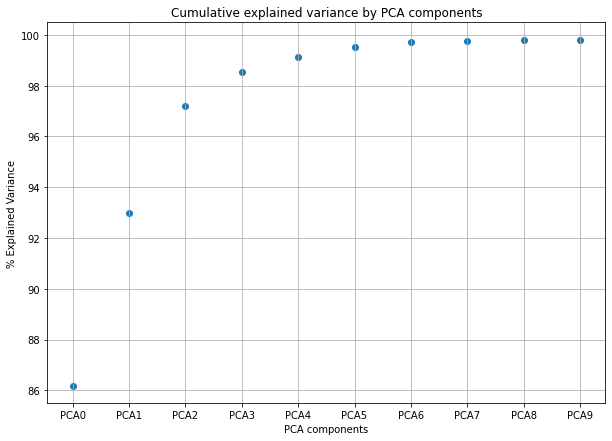

In [10]:
plotCumulativeExplainedVariance(exVarPercentage)

From now on, for this exercise we will use only the first three PCA components to describe the dataset.

### - Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def KMeansInfo(data, n_clusters, **kwargs):
    kmeans = KMeans(n_clusters = n_clusters, **kwargs)
    kmeans.fit(data)
    #Our return consists of a list containing the whole object kmeans, 
    #the sse and the silhouette score
    return [kmeans, kmeans.inertia_, silhouette_score(data, kmeans.labels_)]

In [12]:
components = ['PCA0', 'PCA1', 'PCA2']

In [13]:
#init is the initial conditions. 'random' is random, k-means++ ensures the
#initial centroids are far enough from each other
#n_clusters is a guess of the number of clusters in the data
#We create a new variable named kmeans_kwargs to pass to the function
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 1
    }
#A dictionary seems a proper type of variable to store our results in
kmeansResults = {}
minClusters = 2
maxClusters = 10
for i in range(minClusters, maxClusters):
    nClustersKey = f'{i} Clusters'
    kmeansResults[nClustersKey] = KMeansInfo(dfPCA[components], i, **kmeans_kwargs)

Plot the sse for each number of clusters, to apply the elbow rule. Bonus, plot the silhouette score alongside

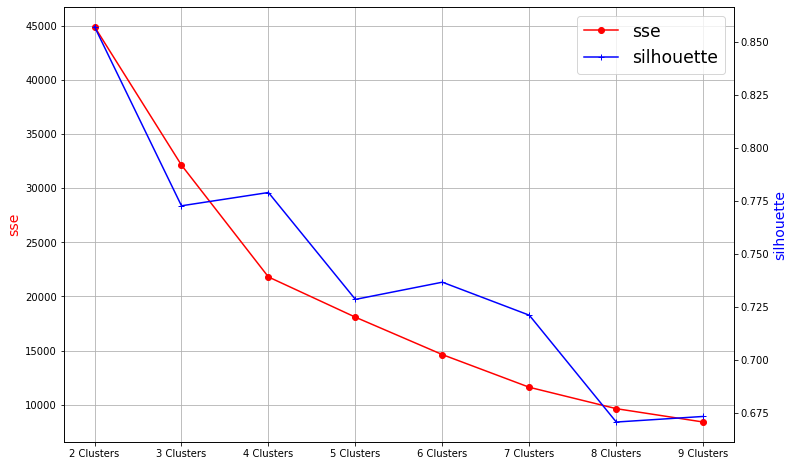

In [14]:
fig, ax  = plt.subplots(figsize = (12,8))

ssePlot = ax.plot(kmeansResults.keys(), np.array(list(kmeansResults.values()))[:,1], marker = 'o', color = 'red', label = 'sse')
ax.set_ylabel('sse', color = 'red', fontsize = 14)
ax.grid()

ax2 = ax.twinx()
silPlot = ax2.plot(kmeansResults.keys(), np.array(list(kmeansResults.values()))[:,2], marker = '+', color = 'blue', label = 'silhouette')
ax2.set_ylabel('silhouette', color = 'blue', fontsize = 14)


totalPlot = ssePlot + silPlot
labels = [p.get_label() for p in totalPlot]
ax.legend(totalPlot, labels, fontsize = 'xx-large')


Looking at the plot, for sse there seems to be a significant change of tendency at 4 clusters and another one less noticeable at 7 clusters. On the other hand, the silhouette coefficient does not vary much, but has its maximum score at 4 clusters.  
In the light of these findings, let's explore the model that yields 4 clusters.

In [15]:
# Extract 3 arrays with the coordinates for each
# found cluster
model = kmeansResults['4 Clusters'][0]

dfPCA['kmeansClusterLabel']= model.labels_
clusterLabels = dfPCA['kmeansClusterLabel'].unique()

In [16]:
def cluster3dPlot(df, clusterLabelCol, title):
    
    plotCol = df.columns[0:3]
    
    clusterLabels = sorted(df[clusterLabelCol].unique())
    
    fig = plt.figure(figsize = (20,16))
    ax = fig.add_subplot(projection = '3d')
    
    for cl in clusterLabels:
        data = df[df[clusterLabelCol] == cl]
        ax.scatter(data[plotCol[0]], data[plotCol[1]], data[plotCol[2]], label = f'Cluster {cl}')
    
    ax.view_init(azim = 30)
    
    ax.set_xlabel('PCA0')
    ax.set_ylabel('PCA1')
    ax.set_zlabel('PCA2')

    ax.set_title(title)
    ax.legend(fontsize = 'x-large')

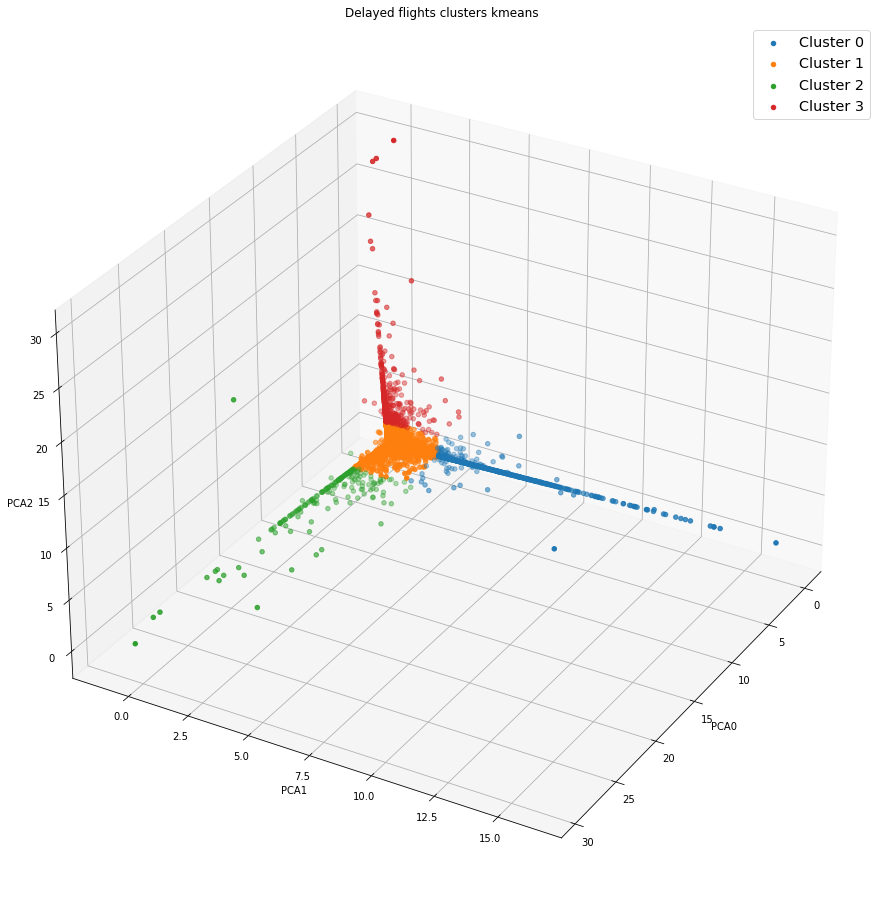

In [17]:
cluster3dPlot(dfPCA, 'kmeansClusterLabel', 'Delayed flights clusters kmeans')

We could arguably have had 3 clusters instead of 4, but all in all, I'd say this was a good job since the three axis are clearly differentiated.

### - Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

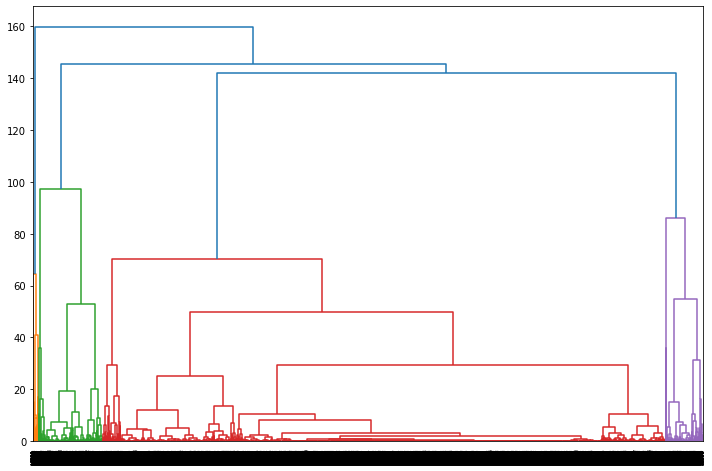

In [19]:
#Explore the dendrogram
figure, ax = plt.subplots(figsize = (12,8))
linkAge = shc.linkage(dfPCA[components], method = 'ward')
hierarchyTree = shc.dendrogram(linkAge, ax = ax)

The dendrogram shows that a 3 clusters configuration maximises the distance between clusters, and that's the optimal number of clusters we are going to use.

In [32]:
def AggloInfo(data, n_clusters, **kwargs):

    model = AgglomerativeClustering(n_clusters = n_clusters, **kwargs)
    model.fit(data)
    
    return model, model.labels_, silhouette_score(data, model.labels_)

In [33]:
AggloKwargs = {
    'linkage' : 'ward',
    'affinity' : 'euclidean'
    }

AggloModel, AggloLabels, AggloSilhouette = AggloInfo(dfPCA[components], n_clusters = 3, **AggloKwargs)

In [36]:
dfPCA['AggloLabel'] = AggloLabels
dfPCA.head(5)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,kmeansClusterLabel,AggloLabels,AggloLabel
0,-0.140621,-0.287726,-0.356544,0.902889,-0.027448,-0.046001,0.376543,0.694331,0.399901,-1.958220,1,0,0
1,-0.141045,-0.338193,-0.379102,-0.484258,-0.468702,-0.058881,0.414187,0.582347,0.207957,-0.084173,1,0,0
2,-0.134331,2.651131,-0.139458,-0.436527,0.054203,-0.032427,1.019385,0.183650,0.197038,-0.053835,0,2,2
3,-0.138873,0.734394,0.014013,-0.452279,-0.102556,-0.043137,-0.165924,0.329686,0.284073,-0.060236,1,2,2
4,-0.138755,0.381333,-0.281222,2.435812,0.620209,-0.030872,-0.686529,0.570888,-2.825861,-0.034847,1,0,0


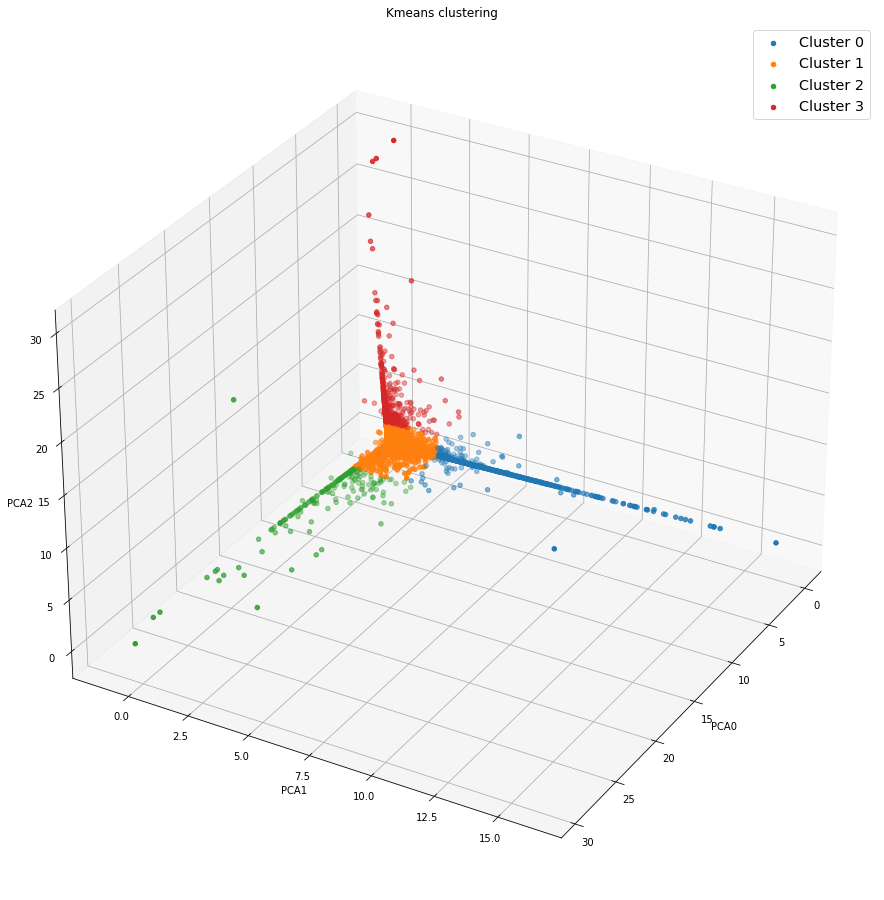

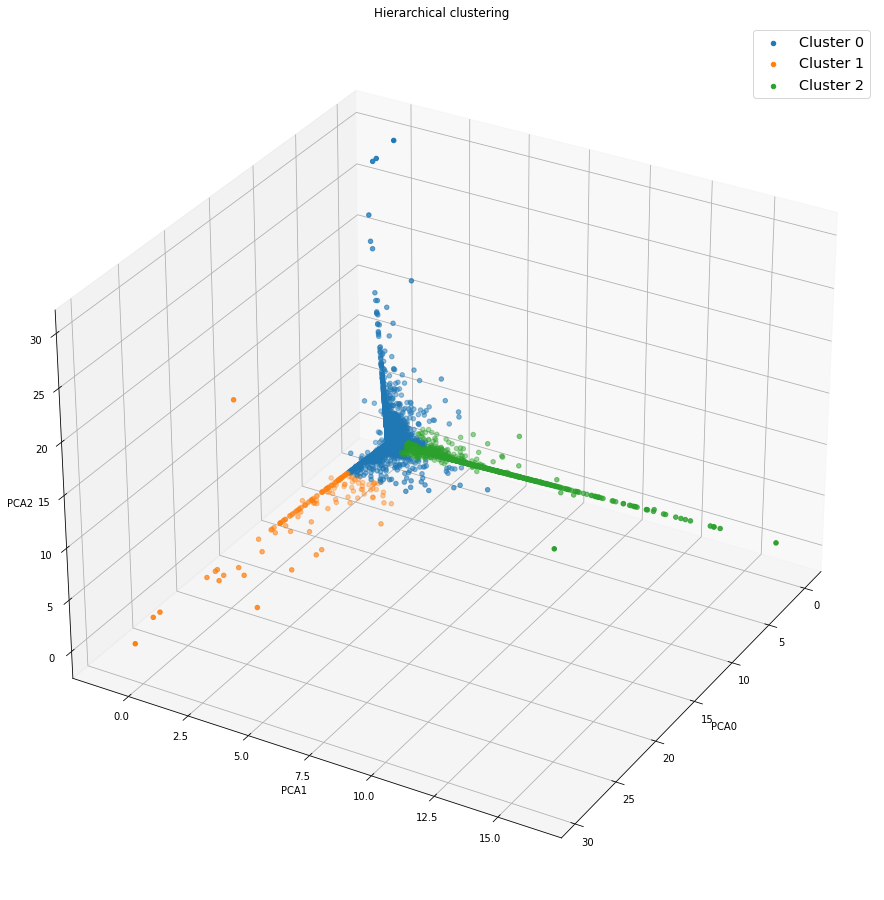

In [39]:
cluster3dPlot(dfPCA, 'kmeansClusterLabel', 'Kmeans clustering')
cluster3dPlot(dfPCA, 'AggloLabel', 'Hierarchical clustering')

### Exercici 3


Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [43]:
print('Silhouette score Kmeans:', kmeansResults['4 Clusters'][2],
      '\nSilhouette score Hierarchical:', AggloSilhouette
     )

Silhouette score Kmeans: 0.7789647 
Silhouette score Hierarchical: 0.655176


### Conclusions
Both the visual representation and the silhouette score favor the kmeans approach rather than the hierarchical clustering for this particular dataset.